# Train, Prune, and Quantize

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import helper
from squeezenet_model import SqueezeNetCIFAR10, SqueezeNetCIFAR10_QAT
from alexnet_model import AlexNetCIFAR10, AlexNetCIFAR10_QAT
from resnet32_model import ResNet, ResNetQAT

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device={device}")

Device=cuda


In [2]:
# mname = "squeezenet"
# mname = "alexnet"
mname = "resnet"

if mname == "squeezenet":
    get_model = SqueezeNetCIFAR10
    get_model_qat = SqueezeNetCIFAR10_QAT
elif mname == "alexnet":
    get_model = AlexNetCIFAR10
    get_model_qat = AlexNetCIFAR10_QAT
elif mname == "resnet":
    get_model = ResNet
    get_model_qat = ResNetQAT

In [3]:
train_loader, test_loader = helper.load_dataset(batch_size=128)

In [4]:
model_fp32 = get_model()
# model_fp32.load_model('squeezenet_bn_cifar10_fp32.pth')

total_params = sum(p.numel() for p in model_fp32.parameters())
print(f"Total parameters: {total_params}")

trainable_params = sum(p.numel() for p in model_fp32.parameters() if p.requires_grad)
print(f"Trainable parameters: {trainable_params}")

Total parameters: 466906
Trainable parameters: 466906


## Training

In [5]:
train, test = True, True
epochs = 100
fp32_metrics = helper.train_model(model=model_fp32,train_loader=train_loader,test_loader=test_loader,train=train,test=test,device=device,epochs=epochs)

Epoch [1/100] 

Train Loss: 1.7636, Train Acc: 35.11% 

Test/Val Loss: 1.8575, Test/Val Acc: 41.57%
Epoch [2/100] 

Train Loss: 1.3252, Train Acc: 52.46% 

Test/Val Loss: 1.1105, Test/Val Acc: 61.06%
Epoch [3/100] 

Train Loss: 1.1315, Train Acc: 59.79% 

Test/Val Loss: 0.9472, Test/Val Acc: 66.06%
Epoch [4/100] 

Train Loss: 1.0131, Train Acc: 64.21% 

Test/Val Loss: 1.0888, Test/Val Acc: 64.74%
Epoch [5/100] 

Train Loss: 0.9324, Train Acc: 67.37% 

Test/Val Loss: 0.9065, Test/Val Acc: 69.81%
Epoch [6/100] 

Train Loss: 0.8683, Train Acc: 69.88% 

Test/Val Loss: 0.7508, Test/Val Acc: 74.25%
Epoch [7/100] 

Train Loss: 0.8187, Train Acc: 71.62% 

Test/Val Loss: 0.6429, Test/Val Acc: 77.92%
Epoch [8/100] 

Train Loss: 0.7818, Train Acc: 72.82% 

Test/Val Loss: 0.6593, Test/Val Acc: 77.53%
Epoch [9/100] 

Train Loss: 0.7491, Train Acc: 74.07% 

Test/Val Loss: 0.6500, Test/Val Acc: 77.60%
Epoch [10/100] 

Train Loss: 0.7185, Train Acc: 75.00% 

Test/Val Loss: 0.5754, Test/Val Acc: 80.45%
Epoch [11/100] 

Train Loss: 0.6966, Train Acc: 75.75% 

Test/Val Loss: 0.6254, Test/Val Acc: 79.40%
Epoch [12/100] 

Train Loss: 0.6812, Train Acc: 76.41% 

Test/Val Loss: 0.5321, Test/Val Acc: 82.03%
Epoch [13/100] 

Train Loss: 0.6615, Train Acc: 76.91% 

Test/Val Loss: 0.5821, Test/Val Acc: 80.18%
Epoch [14/100] 

Train Loss: 0.6456, Train Acc: 77.66% 

Test/Val Loss: 0.4962, Test/Val Acc: 82.62%
Epoch [15/100] 

Train Loss: 0.6336, Train Acc: 78.13% 

Test/Val Loss: 0.5281, Test/Val Acc: 82.14%
Epoch [16/100] 

Train Loss: 0.6147, Train Acc: 78.45% 

Test/Val Loss: 0.5567, Test/Val Acc: 80.66%
Epoch [17/100] 

Train Loss: 0.6068, Train Acc: 79.04% 

Test/Val Loss: 0.5055, Test/Val Acc: 82.64%
Epoch [18/100] 

Train Loss: 0.5917, Train Acc: 79.58% 

Test/Val Loss: 0.4587, Test/Val Acc: 84.49%
Epoch [19/100] 

Train Loss: 0.5813, Train Acc: 79.82% 

Test/Val Loss: 0.4638, Test/Val Acc: 83.78%
Epoch [20/100] 

Train Loss: 0.5695, Train Acc: 80.23% 

Test/Val Loss: 0.5402, Test/Val Acc: 82.07%
Epoch [21/100] 

Train Loss: 0.5619, Train Acc: 80.48% 

Test/Val Loss: 0.4261, Test/Val Acc: 85.35%
Epoch [22/100] 

Train Loss: 0.5496, Train Acc: 80.96% 

Test/Val Loss: 0.4856, Test/Val Acc: 83.54%
Epoch [23/100] 

Train Loss: 0.5447, Train Acc: 81.18% 

Test/Val Loss: 0.4254, Test/Val Acc: 85.99%
Epoch [24/100] 

Train Loss: 0.5394, Train Acc: 81.35% 

Test/Val Loss: 0.4522, Test/Val Acc: 84.98%
Epoch [25/100] 

Train Loss: 0.5290, Train Acc: 81.55% 

Test/Val Loss: 0.4663, Test/Val Acc: 84.42%
Epoch [26/100] 

Train Loss: 0.5207, Train Acc: 81.90% 

Test/Val Loss: 0.4337, Test/Val Acc: 85.03%
Epoch [27/100] 

Train Loss: 0.5102, Train Acc: 82.40% 

Test/Val Loss: 0.4679, Test/Val Acc: 84.34%
Epoch [28/100] 

Train Loss: 0.5060, Train Acc: 82.19% 

Test/Val Loss: 0.4433, Test/Val Acc: 85.62%
Epoch [29/100] 

Train Loss: 0.4985, Train Acc: 82.62% 

Test/Val Loss: 0.4131, Test/Val Acc: 86.18%
Epoch [30/100] 

Train Loss: 0.4941, Train Acc: 82.87% 

Test/Val Loss: 0.4241, Test/Val Acc: 85.73%
Epoch [31/100] 

Train Loss: 0.4918, Train Acc: 82.97% 

Test/Val Loss: 0.4244, Test/Val Acc: 85.83%
Epoch [32/100] 

Train Loss: 0.4834, Train Acc: 83.17% 

Test/Val Loss: 0.3974, Test/Val Acc: 86.55%
Epoch [33/100] 

Train Loss: 0.4725, Train Acc: 83.74% 

Test/Val Loss: 0.3867, Test/Val Acc: 87.13%
Epoch [34/100] 

Train Loss: 0.4785, Train Acc: 83.53% 

Test/Val Loss: 0.4051, Test/Val Acc: 86.11%
Epoch [35/100] 

Train Loss: 0.4674, Train Acc: 83.90% 

Test/Val Loss: 0.3829, Test/Val Acc: 87.42%
Epoch [36/100] 

Train Loss: 0.4703, Train Acc: 83.53% 

Test/Val Loss: 0.3966, Test/Val Acc: 86.58%
Epoch [37/100] 

Train Loss: 0.4639, Train Acc: 83.91% 

Test/Val Loss: 0.4001, Test/Val Acc: 86.83%
Epoch [38/100] 

Train Loss: 0.4611, Train Acc: 84.17% 

Test/Val Loss: 0.4604, Test/Val Acc: 84.45%
Epoch [39/100] 

Train Loss: 0.4519, Train Acc: 84.34% 

Test/Val Loss: 0.3942, Test/Val Acc: 87.23%
Epoch [40/100] 

Train Loss: 0.4530, Train Acc: 84.22% 

Test/Val Loss: 0.3996, Test/Val Acc: 86.45%
Epoch [41/100] 

Train Loss: 0.4488, Train Acc: 84.43% 

Test/Val Loss: 0.3962, Test/Val Acc: 86.77%
Epoch [42/100] 

Train Loss: 0.4372, Train Acc: 84.73% 

Test/Val Loss: 0.3970, Test/Val Acc: 86.32%
Epoch [43/100] 

Train Loss: 0.4465, Train Acc: 84.48% 

Test/Val Loss: 0.4297, Test/Val Acc: 85.86%
Epoch [44/100] 

Train Loss: 0.4356, Train Acc: 84.90% 

Test/Val Loss: 0.3667, Test/Val Acc: 87.49%
Epoch [45/100] 

Train Loss: 0.4358, Train Acc: 84.85% 

Test/Val Loss: 0.3744, Test/Val Acc: 87.14%
Epoch [46/100] 

Train Loss: 0.4313, Train Acc: 84.97% 

Test/Val Loss: 0.3565, Test/Val Acc: 87.77%
Epoch [47/100] 

Train Loss: 0.4281, Train Acc: 85.14% 

Test/Val Loss: 0.3760, Test/Val Acc: 87.40%
Epoch [48/100] 

Train Loss: 0.4246, Train Acc: 85.42% 

Test/Val Loss: 0.3876, Test/Val Acc: 86.92%
Epoch [49/100] 

Train Loss: 0.4237, Train Acc: 85.22% 

Test/Val Loss: 0.3770, Test/Val Acc: 87.54%
Epoch [50/100] 

Train Loss: 0.4164, Train Acc: 85.51% 

Test/Val Loss: 0.3612, Test/Val Acc: 88.18%
Epoch [51/100] 

Train Loss: 0.4163, Train Acc: 85.49% 

Test/Val Loss: 0.3717, Test/Val Acc: 87.38%
Epoch [52/100] 

Train Loss: 0.4198, Train Acc: 85.36% 

Test/Val Loss: 0.3810, Test/Val Acc: 86.98%
Epoch [53/100] 

Train Loss: 0.4161, Train Acc: 85.73% 

Test/Val Loss: 0.3886, Test/Val Acc: 87.40%
Epoch [54/100] 

Train Loss: 0.4094, Train Acc: 85.68% 

Test/Val Loss: 0.3562, Test/Val Acc: 88.22%
Epoch [55/100] 

Train Loss: 0.4060, Train Acc: 85.88% 

Test/Val Loss: 0.3855, Test/Val Acc: 87.75%
Epoch [56/100] 

Train Loss: 0.4046, Train Acc: 85.94% 

Test/Val Loss: 0.3926, Test/Val Acc: 87.57%
Epoch [57/100] 

Train Loss: 0.4121, Train Acc: 85.43% 

Test/Val Loss: 0.3407, Test/Val Acc: 88.58%
Epoch [58/100] 

Train Loss: 0.3997, Train Acc: 86.03% 

Test/Val Loss: 0.3698, Test/Val Acc: 88.77%
Epoch [59/100] 

Train Loss: 0.3975, Train Acc: 86.17% 

Test/Val Loss: 0.3359, Test/Val Acc: 88.54%
Epoch [60/100] 

Train Loss: 0.3999, Train Acc: 86.17% 

Test/Val Loss: 0.3591, Test/Val Acc: 88.11%
Epoch [61/100] 

Train Loss: 0.3939, Train Acc: 86.34% 

Test/Val Loss: 0.3486, Test/Val Acc: 88.49%
Epoch [62/100] 

Train Loss: 0.3954, Train Acc: 86.25% 

Test/Val Loss: 0.3668, Test/Val Acc: 87.32%
Epoch [63/100] 

Train Loss: 0.3882, Train Acc: 86.62% 

Test/Val Loss: 0.3416, Test/Val Acc: 88.84%
Epoch [64/100] 

Train Loss: 0.3923, Train Acc: 86.44% 

Test/Val Loss: 0.3204, Test/Val Acc: 88.95%
Epoch [65/100] 

Train Loss: 0.3874, Train Acc: 86.50% 

Test/Val Loss: 0.3450, Test/Val Acc: 88.60%
Epoch [66/100] 

Train Loss: 0.3860, Train Acc: 86.48% 

Test/Val Loss: 0.3696, Test/Val Acc: 87.70%
Epoch [67/100] 

Train Loss: 0.3844, Train Acc: 86.68% 

Test/Val Loss: 0.3680, Test/Val Acc: 88.27%
Epoch [68/100] 

Train Loss: 0.3934, Train Acc: 86.34% 

Test/Val Loss: 0.3583, Test/Val Acc: 87.81%
Epoch [69/100] 

Train Loss: 0.3783, Train Acc: 86.73% 

Test/Val Loss: 0.3398, Test/Val Acc: 88.46%
Epoch [70/100] 

Train Loss: 0.3868, Train Acc: 86.46% 

Test/Val Loss: 0.3404, Test/Val Acc: 89.00%
Epoch [71/100] 

Train Loss: 0.3790, Train Acc: 86.75% 

Test/Val Loss: 0.3651, Test/Val Acc: 88.20%
Epoch [72/100] 

Train Loss: 0.3726, Train Acc: 87.06% 

Test/Val Loss: 0.3535, Test/Val Acc: 88.40%
Epoch [73/100] 

Train Loss: 0.3749, Train Acc: 86.80% 

Test/Val Loss: 0.3159, Test/Val Acc: 89.05%
Epoch [74/100] 

Train Loss: 0.3751, Train Acc: 87.05% 

Test/Val Loss: 0.3348, Test/Val Acc: 88.91%
Epoch [75/100] 

Train Loss: 0.3724, Train Acc: 87.12% 

Test/Val Loss: 0.3602, Test/Val Acc: 87.84%
Epoch [76/100] 

Train Loss: 0.3701, Train Acc: 86.99% 

Test/Val Loss: 0.3762, Test/Val Acc: 88.30%
Epoch [77/100] 

Train Loss: 0.3714, Train Acc: 87.05% 

Test/Val Loss: 0.3448, Test/Val Acc: 88.84%
Epoch [78/100] 

Train Loss: 0.3683, Train Acc: 87.14% 

Test/Val Loss: 0.3390, Test/Val Acc: 88.54%
Epoch [79/100] 

Train Loss: 0.3715, Train Acc: 87.12% 

Test/Val Loss: 0.3523, Test/Val Acc: 88.57%
Epoch [80/100] 

Train Loss: 0.3692, Train Acc: 87.04% 

Test/Val Loss: 0.3294, Test/Val Acc: 89.22%
Epoch [81/100] 

Train Loss: 0.3661, Train Acc: 87.14% 

Test/Val Loss: 0.3073, Test/Val Acc: 89.61%
Epoch [82/100] 

Train Loss: 0.3638, Train Acc: 87.32% 

Test/Val Loss: 0.3449, Test/Val Acc: 88.78%
Epoch [83/100] 

Train Loss: 0.3644, Train Acc: 87.32% 

Test/Val Loss: 0.3753, Test/Val Acc: 87.83%
Epoch [84/100] 

Train Loss: 0.3631, Train Acc: 87.49% 

Test/Val Loss: 0.3265, Test/Val Acc: 89.50%
Epoch [85/100] 

Train Loss: 0.3620, Train Acc: 87.48% 

Test/Val Loss: 0.3627, Test/Val Acc: 88.61%
Epoch [86/100] 

Train Loss: 0.3634, Train Acc: 87.48% 

Test/Val Loss: 0.3474, Test/Val Acc: 88.76%
Epoch [87/100] 

Train Loss: 0.3633, Train Acc: 87.37% 

Test/Val Loss: 0.3214, Test/Val Acc: 89.82%
Epoch [88/100] 

Train Loss: 0.3593, Train Acc: 87.37% 

Test/Val Loss: 0.3728, Test/Val Acc: 88.10%
Epoch [89/100] 

Train Loss: 0.3551, Train Acc: 87.59% 

Test/Val Loss: 0.3320, Test/Val Acc: 89.36%
Epoch [90/100] 

Train Loss: 0.3605, Train Acc: 87.38% 

Test/Val Loss: 0.3440, Test/Val Acc: 89.26%
Epoch [91/100] 

Train Loss: 0.3606, Train Acc: 87.62% 

Test/Val Loss: 0.3276, Test/Val Acc: 89.38%
Epoch [92/100] 

Train Loss: 0.3550, Train Acc: 87.51% 

Test/Val Loss: 0.3259, Test/Val Acc: 89.12%
Epoch [93/100] 

Train Loss: 0.3552, Train Acc: 87.57% 

Test/Val Loss: 0.3306, Test/Val Acc: 89.25%
Epoch [94/100] 

Train Loss: 0.3539, Train Acc: 87.58% 

Test/Val Loss: 0.2998, Test/Val Acc: 90.08%
Epoch [95/100] 

Train Loss: 0.3506, Train Acc: 87.73% 

Test/Val Loss: 0.2985, Test/Val Acc: 90.12%
Epoch [96/100] 

Train Loss: 0.3502, Train Acc: 87.90% 

Test/Val Loss: 0.3101, Test/Val Acc: 89.43%
Epoch [97/100] 

Train Loss: 0.3548, Train Acc: 87.52% 

Test/Val Loss: 0.3177, Test/Val Acc: 89.45%
Epoch [98/100] 

Train Loss: 0.3509, Train Acc: 87.84% 

Test/Val Loss: 0.3271, Test/Val Acc: 89.43%
Epoch [99/100] 

Train Loss: 0.3472, Train Acc: 87.93% 

Test/Val Loss: 0.3185, Test/Val Acc: 89.59%
Epoch [100/100] 

Train Loss: 0.3455, Train Acc: 87.99% 

Test/Val Loss: 0.3165, Test/Val Acc: 89.75%


In [6]:
# model_fp32.save_model(f"{mname}_fp32.pth")
torch.save(model_fp32.state_dict(), f"{mname}_fp32.pth")

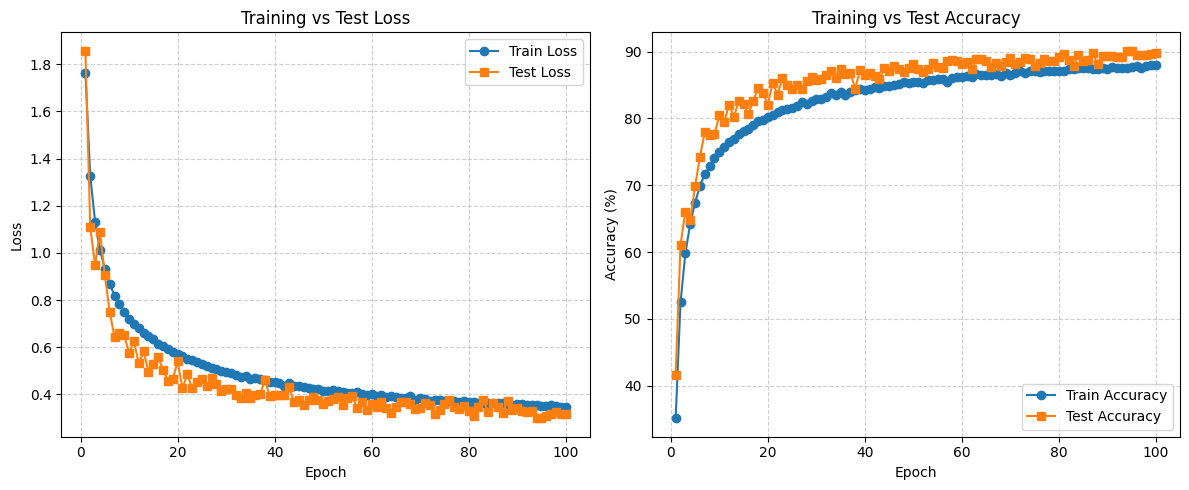

In [7]:
helper.plot_metrics(fp32_metrics)

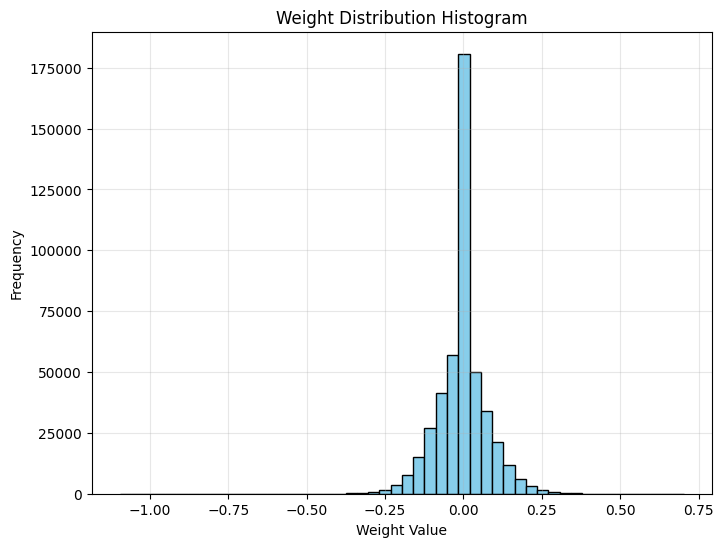

In [8]:
helper.plot_weight_histogram(model_fp32)

## Pruning

In [9]:
model = get_model()
model.load_model(f"{mname}_fp32.pth", device=device)
model.train()

Model loaded from resnet_fp32.pth


ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

In [ ]:
import copy
import torch.nn.utils.prune as prune

prune_levels = [(0.1,'10'), (0.3,'30'), (0.5,'50'), (0.7,'70')]
results = []

best = 0.0
best_name = ""

for p, pname in prune_levels:
    m = copy.deepcopy(model)

    parameters_to_prune = []
    for module in m.modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            parameters_to_prune.append((module, "weight"))

    prune.global_unstructured(
        parameters_to_prune,
        pruning_method=prune.L1Unstructured,
        amount=p
    )

    # fine-tune
    metrics = helper.train_model(model=m,train_loader=train_loader,test_loader=test_loader,device=device)

    # remove pruning masks
    for module in m.modules():
        if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
            prune.remove(module, "weight")

    percent = p * 100
    fname = f"{mname}_{pname}.pth"
    # m.save_model(fname)
    torch.save(m.state_dict(), fname)
    
    acc = helper.evaluate(m,test_loader,device)
    if acc > best:
        best = acc
        best_name = fname

    results.append((p, metrics))

Epoch [1/10] 

Train Loss: 0.3501, Train Acc: 87.78% 

Test/Val Loss: 0.3612, Test/Val Acc: 88.54%
Epoch [2/10] 

Train Loss: 0.3484, Train Acc: 87.79% 

Test/Val Loss: 0.3181, Test/Val Acc: 89.50%
Epoch [3/10] 

Train Loss: 0.3436, Train Acc: 87.99% 

Test/Val Loss: 0.3073, Test/Val Acc: 89.80%
Epoch [4/10] 

Train Loss: 0.3480, Train Acc: 87.87% 

Test/Val Loss: 0.3540, Test/Val Acc: 88.75%
Epoch [5/10] 

Train Loss: 0.3416, Train Acc: 88.03% 

Test/Val Loss: 0.3090, Test/Val Acc: 89.72%
Epoch [6/10] 

Train Loss: 0.3386, Train Acc: 88.33% 

Test/Val Loss: 0.3373, Test/Val Acc: 89.03%
Epoch [7/10] 

Train Loss: 0.3428, Train Acc: 88.05% 

Test/Val Loss: 0.3216, Test/Val Acc: 89.76%
Epoch [8/10] 

Train Loss: 0.3431, Train Acc: 88.14% 

Test/Val Loss: 0.3601, Test/Val Acc: 88.11%
Epoch [9/10] 

Train Loss: 0.3393, Train Acc: 88.21% 

Test/Val Loss: 0.3071, Test/Val Acc: 90.23%
Epoch [10/10] 

Train Loss: 0.3436, Train Acc: 87.97% 

Test/Val Loss: 0.2933, Test/Val Acc: 90.40%


Epoch [1/10] 

Train Loss: 0.3460, Train Acc: 88.02% 

Test/Val Loss: 0.3132, Test/Val Acc: 89.71%
Epoch [2/10] 

Train Loss: 0.3445, Train Acc: 87.77% 

Test/Val Loss: 0.3347, Test/Val Acc: 89.52%
Epoch [3/10] 

Train Loss: 0.3405, Train Acc: 88.08% 

Test/Val Loss: 0.3332, Test/Val Acc: 89.15%
Epoch [4/10] 

Train Loss: 0.3427, Train Acc: 88.01% 

Test/Val Loss: 0.3138, Test/Val Acc: 89.63%
Epoch [5/10] 

Train Loss: 0.3390, Train Acc: 88.20% 

Test/Val Loss: 0.3281, Test/Val Acc: 89.46%
Epoch [6/10] 

Train Loss: 0.3365, Train Acc: 88.32% 

Test/Val Loss: 0.3595, Test/Val Acc: 88.60%
Epoch [7/10] 

Train Loss: 0.3323, Train Acc: 88.28% 

Test/Val Loss: 0.3097, Test/Val Acc: 89.91%
Epoch [8/10] 

Train Loss: 0.3376, Train Acc: 88.30% 

Test/Val Loss: 0.3061, Test/Val Acc: 89.92%
Epoch [9/10] 

Train Loss: 0.3345, Train Acc: 88.21% 

Test/Val Loss: 0.3285, Test/Val Acc: 89.36%
Epoch [10/10] 

Train Loss: 0.3366, Train Acc: 88.33% 

Test/Val Loss: 0.3427, Test/Val Acc: 89.16%


Epoch [1/10] 

Train Loss: 0.3279, Train Acc: 88.52% 

Test/Val Loss: 0.3000, Test/Val Acc: 90.19%
Epoch [2/10] 

Train Loss: 0.3232, Train Acc: 88.74% 

Test/Val Loss: 0.2940, Test/Val Acc: 90.36%
Epoch [3/10] 

Train Loss: 0.3182, Train Acc: 88.84% 

Test/Val Loss: 0.2897, Test/Val Acc: 90.32%
Epoch [4/10] 

Train Loss: 0.3123, Train Acc: 89.17% 

Test/Val Loss: 0.3153, Test/Val Acc: 89.97%
Epoch [5/10] 

Train Loss: 0.3161, Train Acc: 88.79% 

Test/Val Loss: 0.2987, Test/Val Acc: 90.74%
Epoch [6/10] 

Train Loss: 0.3198, Train Acc: 88.77% 

Test/Val Loss: 0.2859, Test/Val Acc: 90.95%
Epoch [7/10] 

Train Loss: 0.3180, Train Acc: 88.99% 

Test/Val Loss: 0.3220, Test/Val Acc: 89.83%
Epoch [8/10] 

Train Loss: 0.3135, Train Acc: 89.20% 

Test/Val Loss: 0.2937, Test/Val Acc: 90.57%
Epoch [9/10] 

Train Loss: 0.3152, Train Acc: 89.06% 

Test/Val Loss: 0.3305, Test/Val Acc: 89.80%
Epoch [10/10] 

Train Loss: 0.3140, Train Acc: 89.15% 

Test/Val Loss: 0.2872, Test/Val Acc: 90.86%


Epoch [1/10] 

Train Loss: 0.3433, Train Acc: 88.12% 

Test/Val Loss: 0.2996, Test/Val Acc: 90.33%
Epoch [2/10] 

Train Loss: 0.3190, Train Acc: 88.98% 

Test/Val Loss: 0.2982, Test/Val Acc: 90.39%
Epoch [3/10] 

Train Loss: 0.3164, Train Acc: 89.06% 

Test/Val Loss: 0.2861, Test/Val Acc: 90.50%
Epoch [4/10] 

Train Loss: 0.3177, Train Acc: 89.01% 

Test/Val Loss: 0.2999, Test/Val Acc: 90.27%
Epoch [5/10] 

Train Loss: 0.3123, Train Acc: 89.17% 

Test/Val Loss: 0.2934, Test/Val Acc: 90.50%
Epoch [6/10] 

Train Loss: 0.3151, Train Acc: 88.88% 

Test/Val Loss: 0.3099, Test/Val Acc: 89.92%
Epoch [7/10] 

Train Loss: 0.3048, Train Acc: 89.30% 

Test/Val Loss: 0.2795, Test/Val Acc: 90.97%
Epoch [8/10] 

Train Loss: 0.3029, Train Acc: 89.54% 

Test/Val Loss: 0.2755, Test/Val Acc: 90.99%
Epoch [9/10] 

Train Loss: 0.3108, Train Acc: 89.25% 

Test/Val Loss: 0.2931, Test/Val Acc: 90.80%
Epoch [10/10] 

Train Loss: 0.2992, Train Acc: 89.55% 

Test/Val Loss: 0.2874, Test/Val Acc: 91.31%


Metrics for pruning with p=0.1


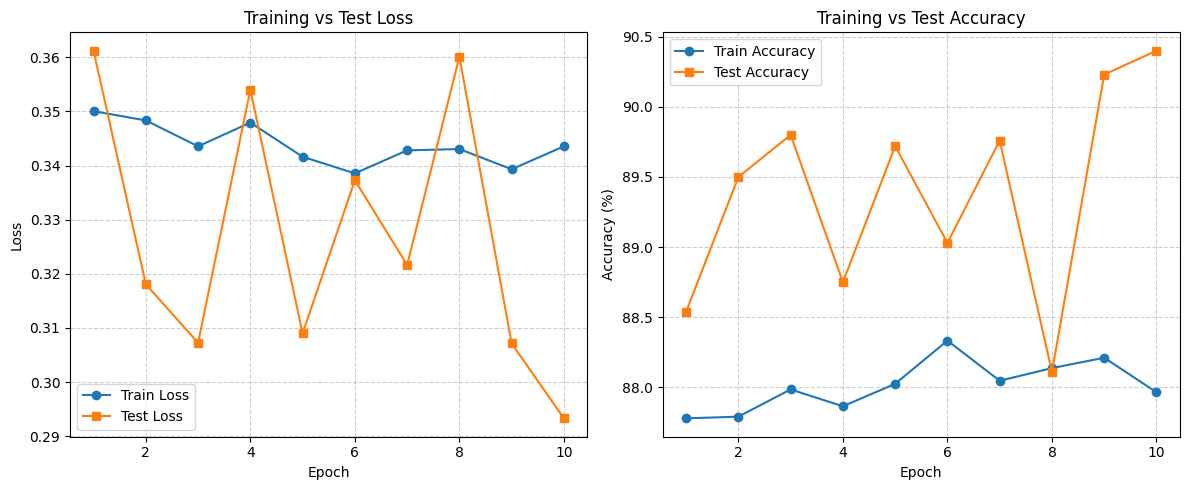

Metrics for pruning with p=0.3


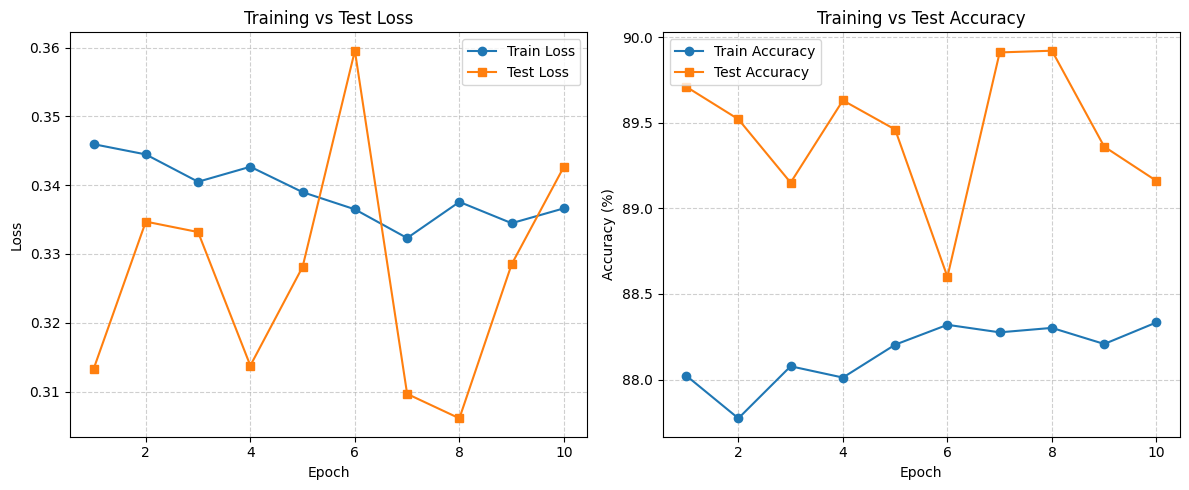

Metrics for pruning with p=0.5


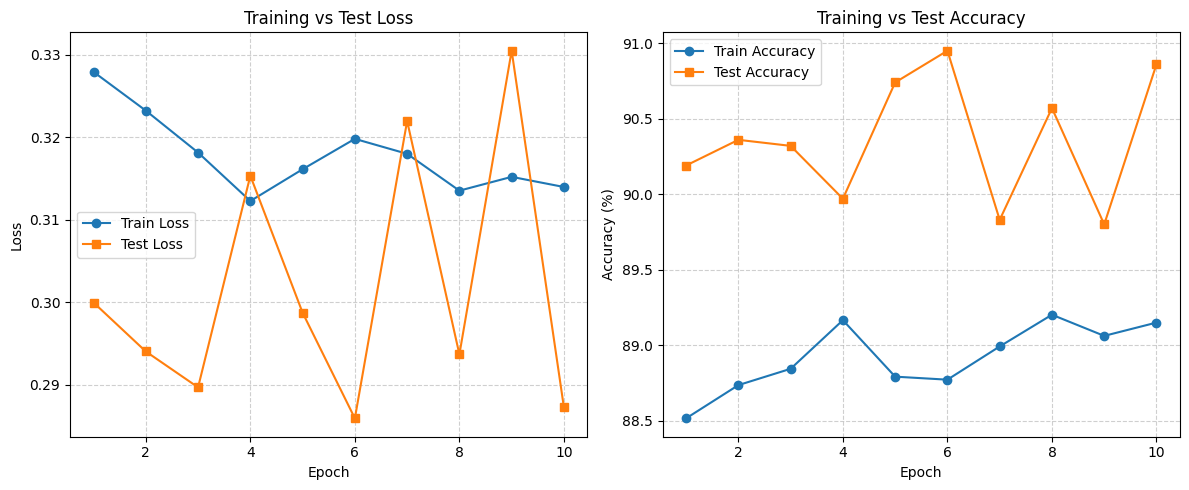

Metrics for pruning with p=0.7


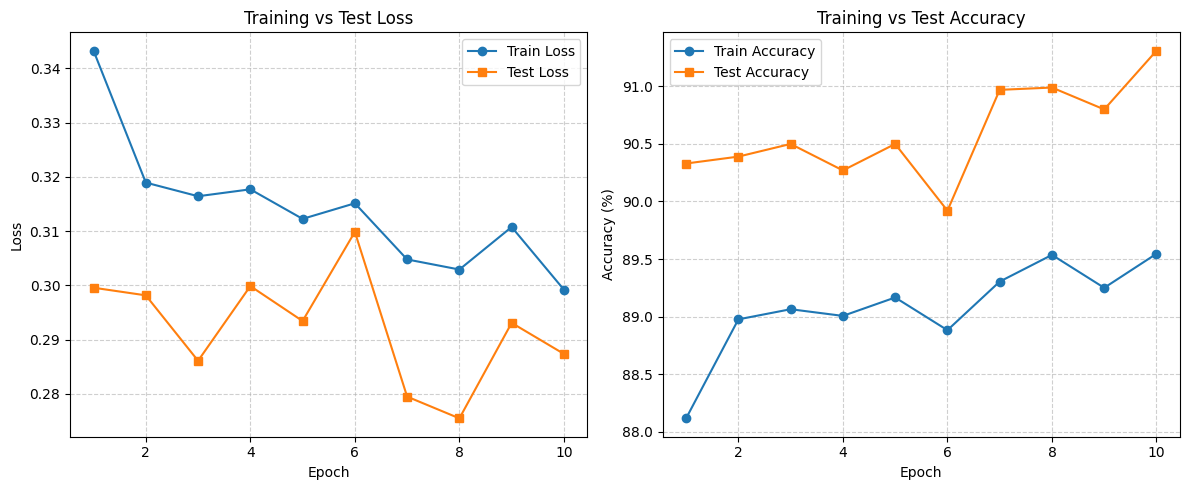

In [ ]:
for p, metrics in results:
    print(f"Metrics for pruning with p={p}")
    helper.plot_metrics(metrics)

## Quantization Aware Training

In [12]:
import torch
from torch.ao.quantization import get_default_qat_qconfig
from torch.ao.quantization.quantize_fx import prepare_qat_fx, convert_fx

model_qat = get_model_qat()
# model_qat.load_model(best_name, device='cpu')
state_dict = torch.load(best_name)
model_fp32.load_state_dict(state_dict)
model_qat.eval()

# example input for FX tracing
example_inputs = (torch.randn(1, 3, 32, 32, device='cpu'),)

# QAT config dictionary, default 8-bit symmetric QAT
qconfig_dict = {"": get_default_qat_qconfig('fbgemm')}

# prepare the model for QAT
model_qat_prepared = prepare_qat_fx(model_qat, qconfig_dict, example_inputs=example_inputs)

model_qat_prepared.to(device)
model_qat_prepared.train()

/tmp/SLURM_5271096/ipykernel_1841988/2910714172.py:18: DeprecationWarning: torch.ao.quantization is deprecated and will be removed in 2.10. 
For migrations of users: 
1. Eager mode quantization (torch.ao.quantization.quantize, torch.ao.quantization.quantize_dynamic), please migrate to use torchao eager mode quantize_ API instead 
2. FX graph mode quantization (torch.ao.quantization.quantize_fx.prepare_fx,torch.ao.quantization.quantize_fx.convert_fx, please migrate to use torchao pt2e quantization API instead (prepare_pt2e, convert_pt2e) 
3. pt2e quantization has been migrated to torchao (https://github.com/pytorch/ao/tree/main/torchao/quantization/pt2e) 
see https://github.com/pytorch/ao/issues/2259 for more details
  model_qat_prepared = prepare_qat_fx(model_qat, qconfig_dict, example_inputs=example_inputs)
/home1/kodachi/.conda/envs/ee599/lib/python3.12/site-packages/torch/ao/quantization/quantize_fx.py:146: FutureWarning: Passing a QConfig dictionary to prepare is deprecated and wil

GraphModule(
  (activation_post_process_0): FusedMovingAvgObsFakeQuantize(
    fake_quant_enabled=tensor([1], device='cuda:0'), observer_enabled=tensor([1], device='cuda:0'), scale=tensor([1.], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32), dtype=torch.quint8, quant_min=0, quant_max=127, qscheme=torch.per_tensor_affine, reduce_range=True
    (activation_post_process): MovingAverageMinMaxObserver(min_val=inf, max_val=-inf)
  )
  (conv1): ConvBnReLU2d(
    3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
    (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (weight_fake_quant): FusedMovingAvgObsFakeQuantize(
      fake_quant_enabled=tensor([1], device='cuda:0'), observer_enabled=tensor([1], device='cuda:0'), scale=tensor([1.], device='cuda:0'), zero_point=tensor([0], device='cuda:0', dtype=torch.int32), dtype=torch.qint8, quant_min=-128, quant_max=127, qscheme=torch.per_channel_symmetric, reduce_ra

In [ ]:
qat_metrics = helper.train_model(model=model_qat_prepared,train_loader=train_loader,test_loader=test_loader,device=device,epochs=20)

Epoch [1/20] 

Train Loss: 0.3636, Train Acc: 87.35% 

Test/Val Loss: 0.3185, Test/Val Acc: 89.49%
Epoch [2/20] 

Train Loss: 0.3701, Train Acc: 87.14% 

Test/Val Loss: 0.3443, Test/Val Acc: 88.85%
Epoch [3/20] 

Train Loss: 0.3652, Train Acc: 87.24% 

Test/Val Loss: 0.3941, Test/Val Acc: 87.98%
Epoch [4/20] 

Train Loss: 0.3705, Train Acc: 87.09% 

Test/Val Loss: 0.3410, Test/Val Acc: 88.90%
Epoch [5/20] 

Train Loss: 0.3640, Train Acc: 87.16% 

Test/Val Loss: 0.3204, Test/Val Acc: 89.60%
Epoch [6/20] 

Train Loss: 0.3617, Train Acc: 87.39% 

Test/Val Loss: 0.3346, Test/Val Acc: 89.32%
Epoch [7/20] 

Train Loss: 0.3580, Train Acc: 87.55% 

Test/Val Loss: 0.3289, Test/Val Acc: 89.49%
Epoch [8/20] 

Train Loss: 0.3568, Train Acc: 87.67% 

Test/Val Loss: 0.3121, Test/Val Acc: 90.02%
Epoch [9/20] 

Train Loss: 0.3578, Train Acc: 87.48% 

Test/Val Loss: 0.3172, Test/Val Acc: 89.41%
Epoch [10/20] 

Train Loss: 0.3552, Train Acc: 87.65% 

Test/Val Loss: 0.3828, Test/Val Acc: 88.08%
Epoch [11/20] 

Train Loss: 0.3572, Train Acc: 87.57% 

Test/Val Loss: 0.3172, Test/Val Acc: 89.55%
Epoch [12/20] 

Train Loss: 0.3534, Train Acc: 87.66% 

Test/Val Loss: 0.3570, Test/Val Acc: 87.89%
Epoch [13/20] 

Train Loss: 0.3516, Train Acc: 87.68% 

Test/Val Loss: 0.3231, Test/Val Acc: 89.59%
Epoch [14/20] 

Train Loss: 0.3540, Train Acc: 87.84% 

Test/Val Loss: 0.3775, Test/Val Acc: 87.70%
Epoch [15/20] 

Train Loss: 0.3582, Train Acc: 87.55% 

Test/Val Loss: 0.3118, Test/Val Acc: 89.81%
Epoch [16/20] 

Train Loss: 0.3501, Train Acc: 87.88% 

Test/Val Loss: 0.3538, Test/Val Acc: 87.72%
Epoch [17/20] 

Train Loss: 0.3498, Train Acc: 87.84% 

Test/Val Loss: 0.3193, Test/Val Acc: 89.92%
Epoch [18/20] 

Train Loss: 0.3514, Train Acc: 87.67% 

Test/Val Loss: 0.2983, Test/Val Acc: 90.12%
Epoch [19/20] 

Train Loss: 0.3453, Train Acc: 87.93% 

Test/Val Loss: 0.3427, Test/Val Acc: 89.05%
Epoch [20/20] 

Train Loss: 0.3436, Train Acc: 87.98% 

Test/Val Loss: 0.3665, Test/Val Acc: 88.34%


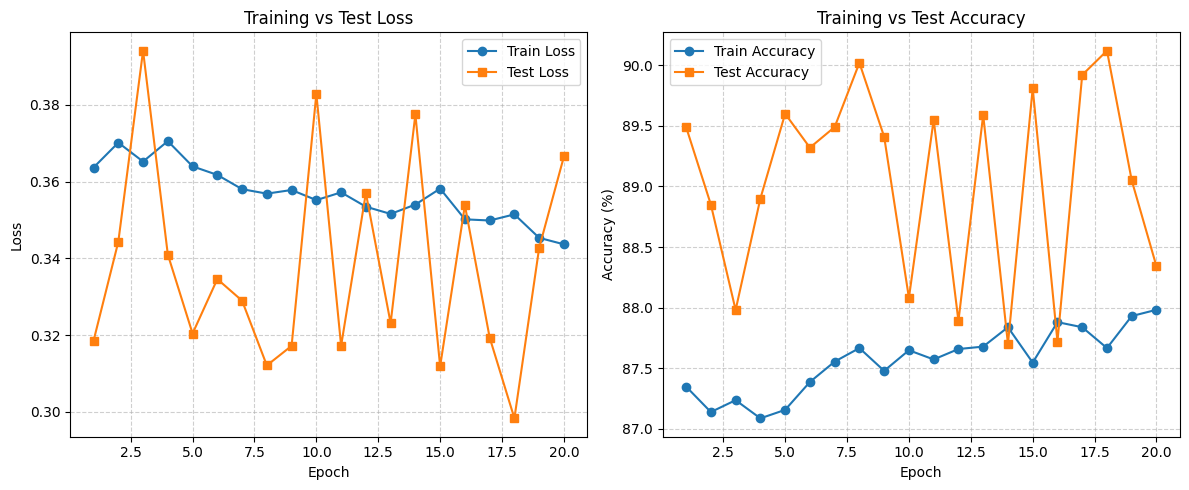

In [ ]:
helper.plot_metrics(qat_metrics)

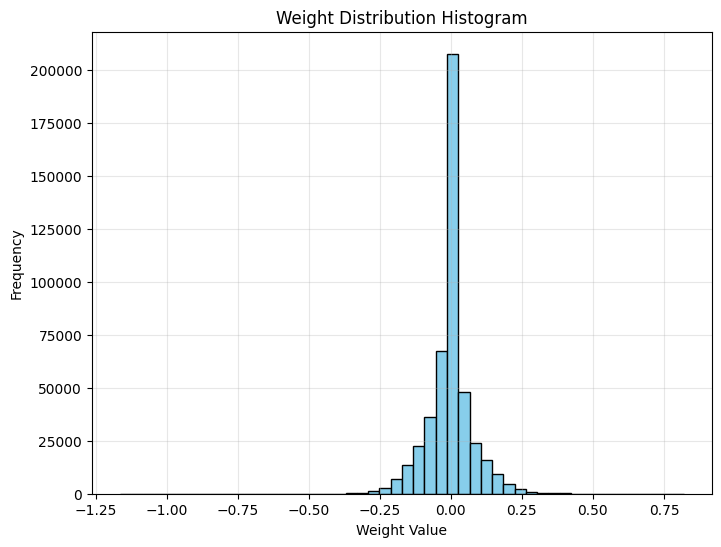

In [ ]:
helper.plot_weight_histogram(model_qat_prepared)

In [16]:
model_qat_prepared.eval()
torch.save(model_qat_prepared.state_dict(), f"{mname}_qat_preconvert.pth")
# model_int8 = convert_fx(model_qat_prepared.cpu())
# torch.save(model_int8.state_dict(), "squeezenet_int8_qat.pth")